# Seaborn for Data Visualization

[Official Documentation](https://seaborn.pydata.org)

[Click here For color palettes](https://matplotlib.org/stable/gallery/color/named_colors.html)

In [1]:
# !pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Scatterplot in seaborn

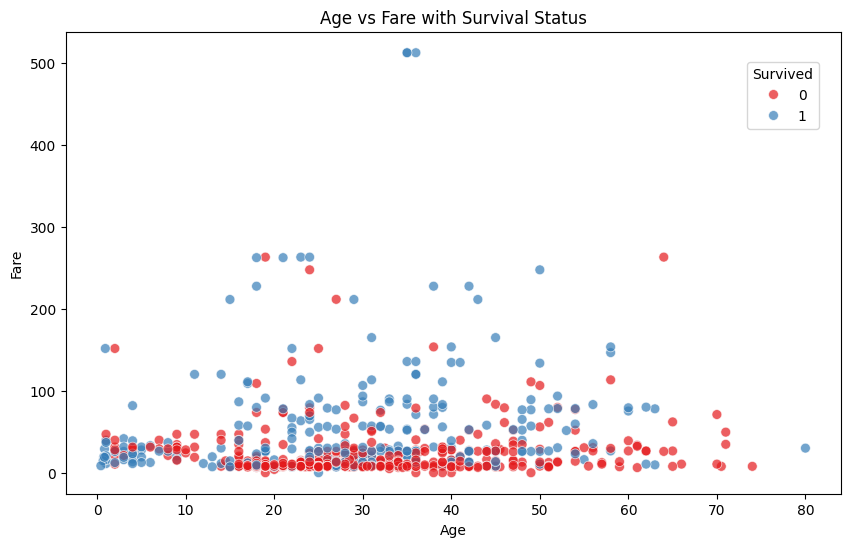

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=titanic, x='age', y='fare', hue='survived', palette='Set1', s=50, alpha=0.7)
plt.title('Age vs Fare with Survival Status')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', bbox_to_anchor=(0.87, 0.95), loc='upper left');
# plt.show()

### Histogram

To understand the shape of the distribution of data

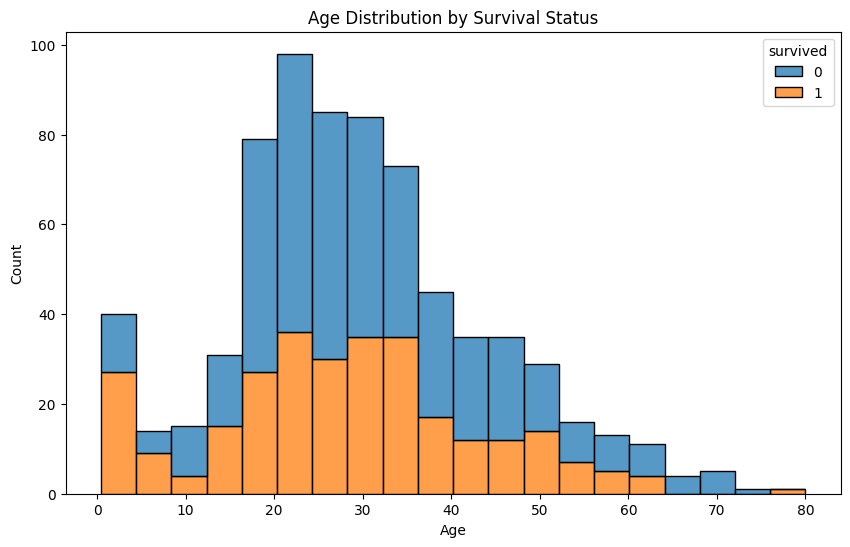

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack')
# plt.axvline(titanic['age'].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean Age: {titanic['age'].mean():.2f}")
# plt.axvline(titanic['age'].median(), color='green', linestyle='dashed', linewidth=1, label=f'Median Age: {titanic["age"].median():.2f}')
plt.title('Age Distribution by Survival Status')
# plt.legend()

plt.xlabel('Age')
plt.ylabel('Count');

In [6]:
# The distribution above is right-skewed, indicating that a larger number of passengers were younger, with fewer older passengers.

### Kdeplot in Seaborn

It shows a smooth, continuous `probability density curve`. Think of it as a smoothed version of histogram that shows the shape of the distribution more clearly.

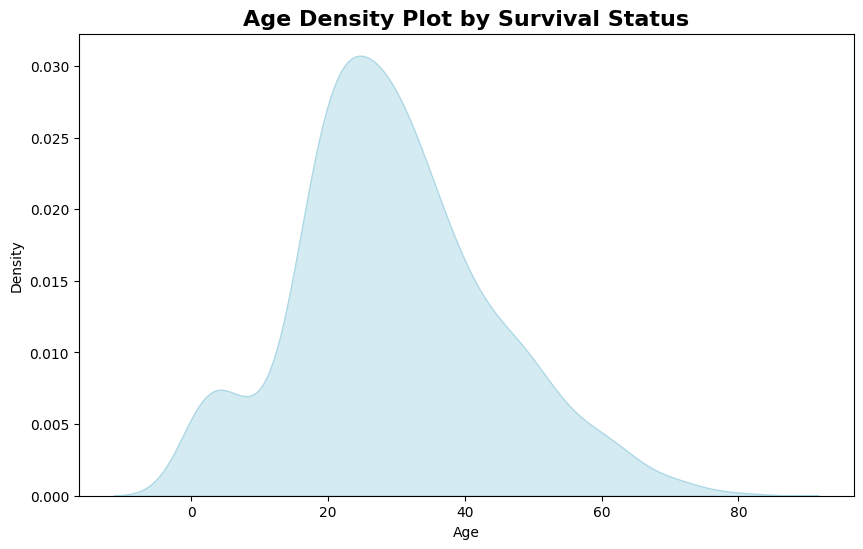

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=titanic, x='age', fill=True, color='lightblue', alpha=0.5)
plt.title('Age Density Plot by Survival Status', fontsize=16, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Density');

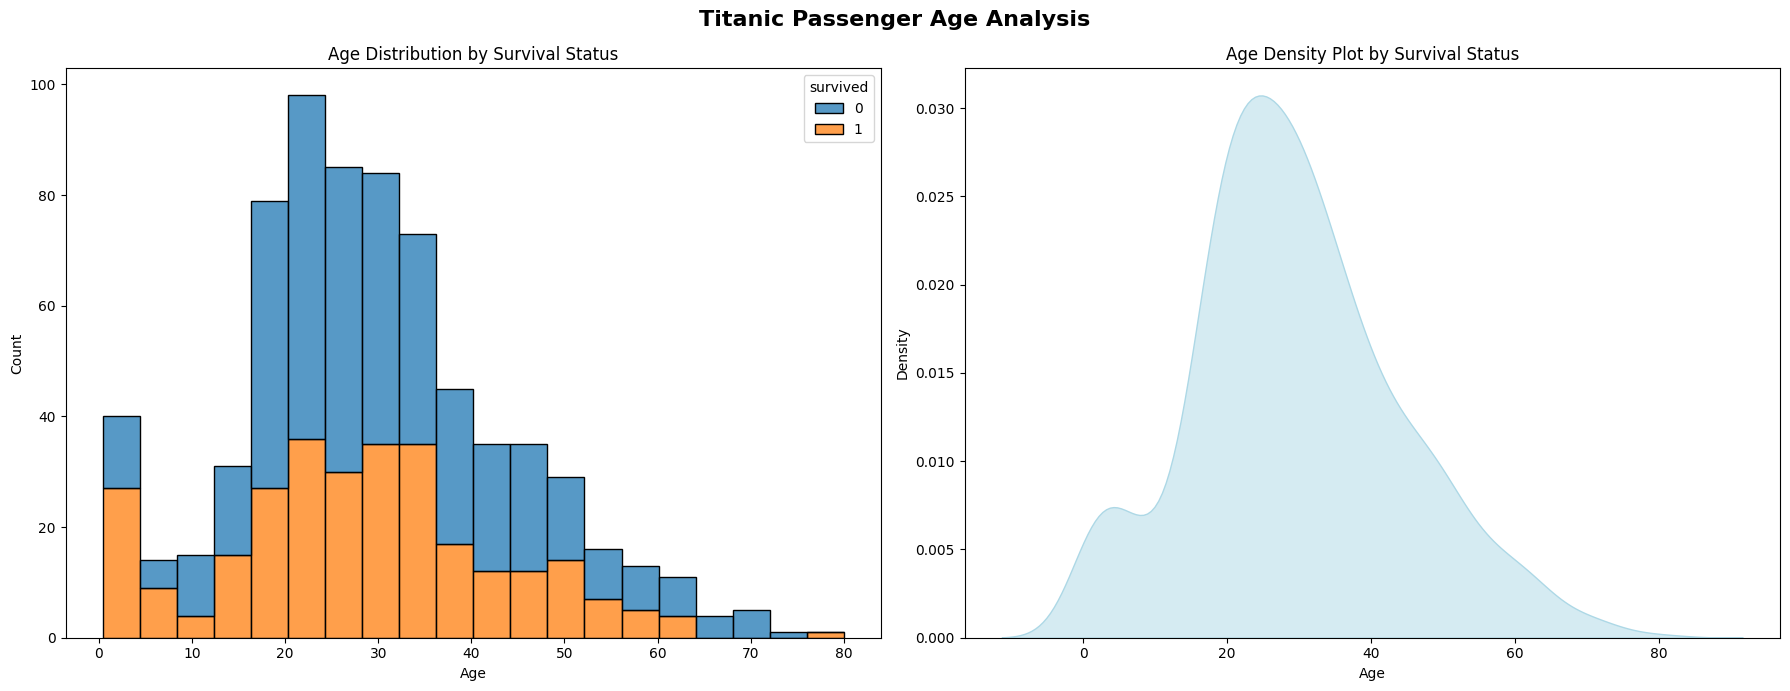

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Histogram
sns.histplot(data=titanic, x='age', hue='survived', multiple='stack', ax=axes[0])
axes[0].set_title('Age Distribution by Survival Status')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

# KDE Plot
sns.kdeplot(data=titanic, x='age', fill=True, color='lightblue', alpha=0.5, ax=axes[1]) 
axes[1].set_title('Age Density Plot by Survival Status')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')

plt.suptitle('Titanic Passenger Age Analysis', fontsize=16, fontweight='bold')

plt.tight_layout();

### Boxplot


Boxplot or (Box and whisker plot) shows the statistical summary of data through 5 key values:
- Minimum: Lowest value (excluding outliers)
- Q1 (First Quartile): 25th percentile value
- Q2 : Median
- Q3 (Third Quartile): 75th percentile value
- Maximum: Highest value (excluding the outliers)
- Outliers (Points beyond whiskers)

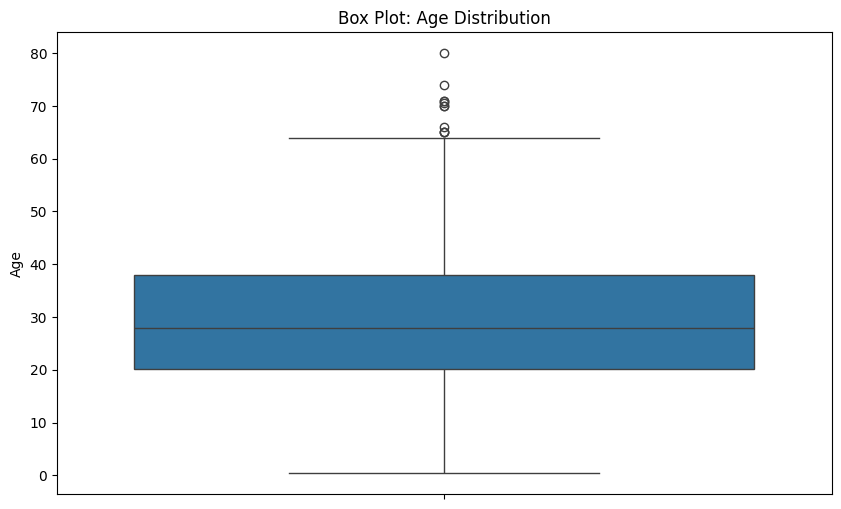

Q1: 20.125, Q2 (median age): 28.0, Q3: 38.0, IQR: 17.875
Lower Bound: -6.6875, Upper Bound: 64.8125


In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=titanic, y='age')
plt.title('Box Plot: Age Distribution')
plt.ylabel('Age')
plt.show()


q1 = titanic['age'].quantile(0.25)
q3 = titanic['age'].quantile(0.75)
q2 = titanic['age'].median()
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Q1: {q1}, Q2 (median age): {q2}, Q3: {q3}, IQR: {iqr}")
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")


# Use the upper and lower bounds to identify outliers in the 'age' column and replace them with the median age value

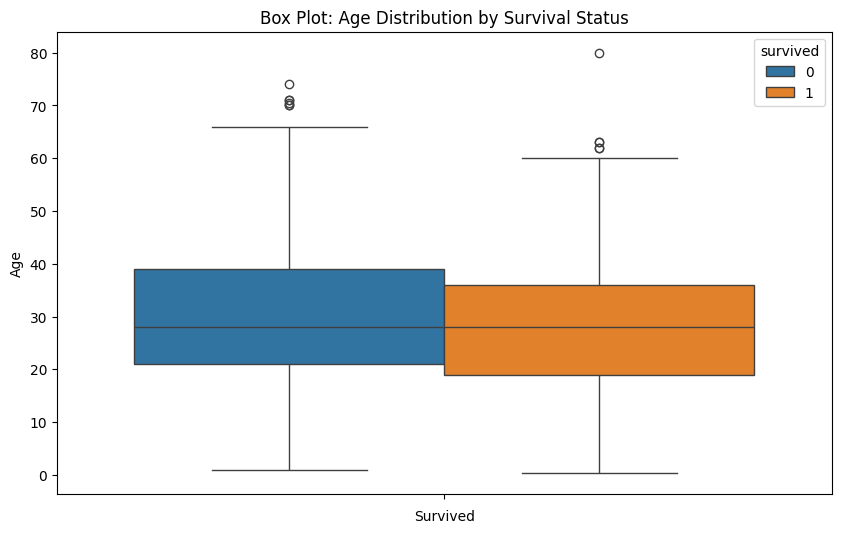

In [10]:
# Box Plot: Age Distribution by Survival Status
plt.figure(figsize=(10,6))
sns.boxplot(data=titanic, hue='survived', y='age')
plt.title('Box Plot: Age Distribution by Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

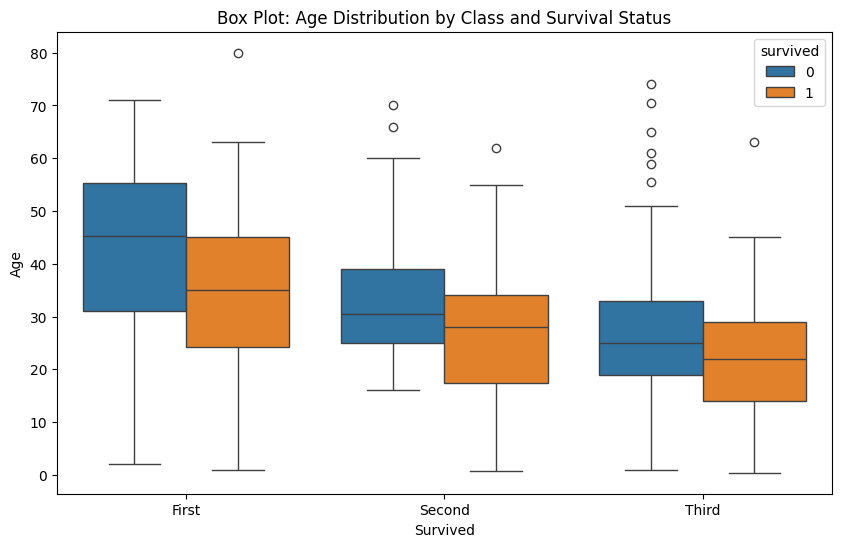

In [11]:
# Box Plot: Age Distribution by Class and Survival Status
plt.figure(figsize=(10,6))
sns.boxplot(data=titanic, x='class', y='age', hue='survived')
plt.title('Box Plot: Age Distribution by Class and Survival Status')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

### Heatmap in Seaborn

Heatmap uses colors to represent values in a matrix or table. Darker/brigher colors indicate higher/lower values.

Generally used to visualize correlation matrices and to compare values.

In [12]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


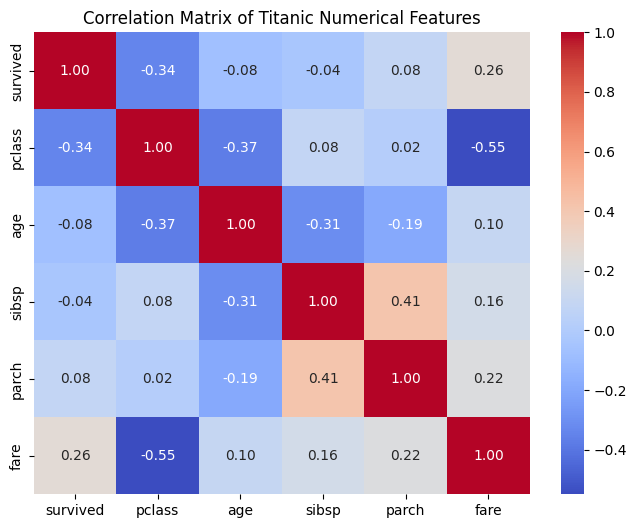

In [13]:
numerical_cols = ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

correlation_matrix = titanic[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Titanic Numerical Features');

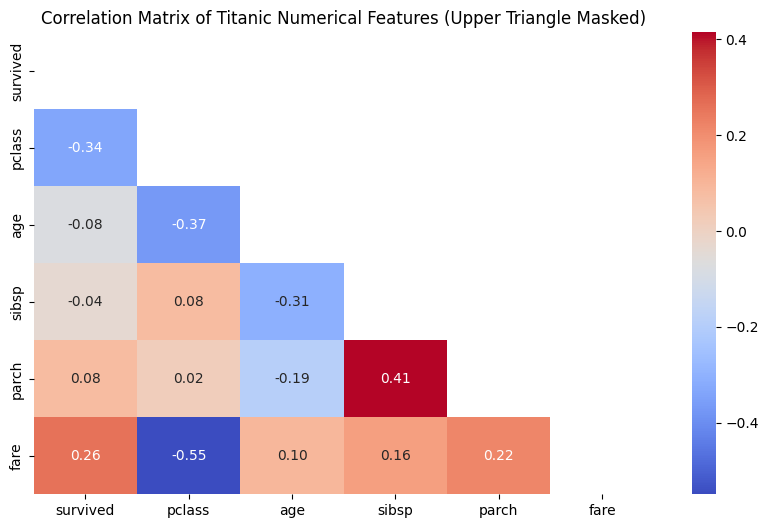

In [14]:
plt.figure(figsize=(10, 6))

# creates a mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

plt.title('Correlation Matrix of Titanic Numerical Features (Upper Triangle Masked)');
plt.show()


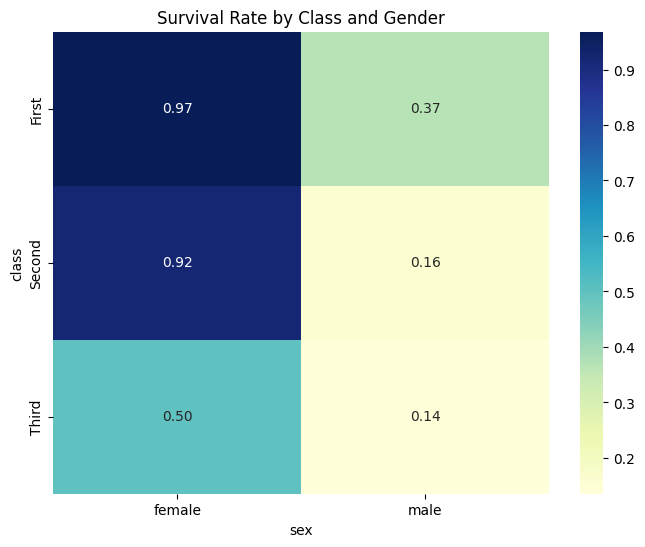

In [15]:
# Categorical Heatmap for survival rate by class and gender

survival_pivot = titanic.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
# survival_pivot


plt.figure(figsize=(8, 6))
sns.heatmap(survival_pivot, annot=True, fmt=".2f", cmap='YlGnBu', cbar=True)
plt.title('Survival Rate by Class and Gender');

In [16]:
survival_pivot

sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


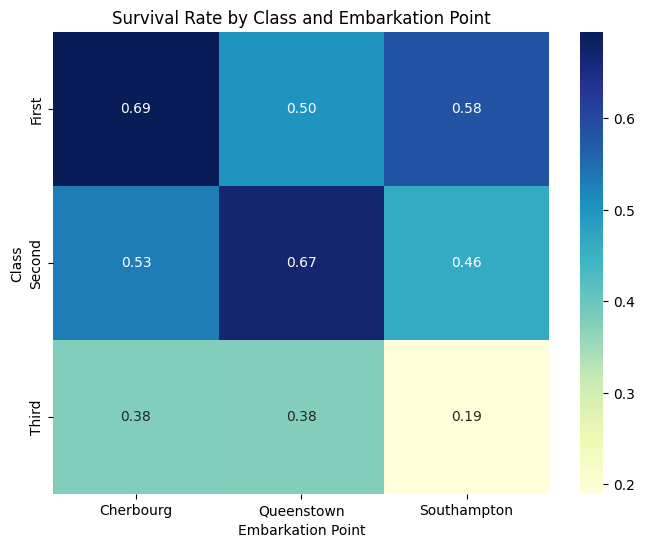

In [17]:
survival_rate_embarked = titanic.pivot_table(index='class', columns='embark_town', values='survived', aggfunc='mean')
plt.figure(figsize=(8, 6))
sns.heatmap(survival_rate_embarked, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Survival Rate by Class and Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Class')
plt.show()

### Pair Plot

A pairplot creates a grid of plots. It is used to explore multiple variables at once and also to perform a comprehensive review of the dataset.

<Figure size 1500x800 with 0 Axes>

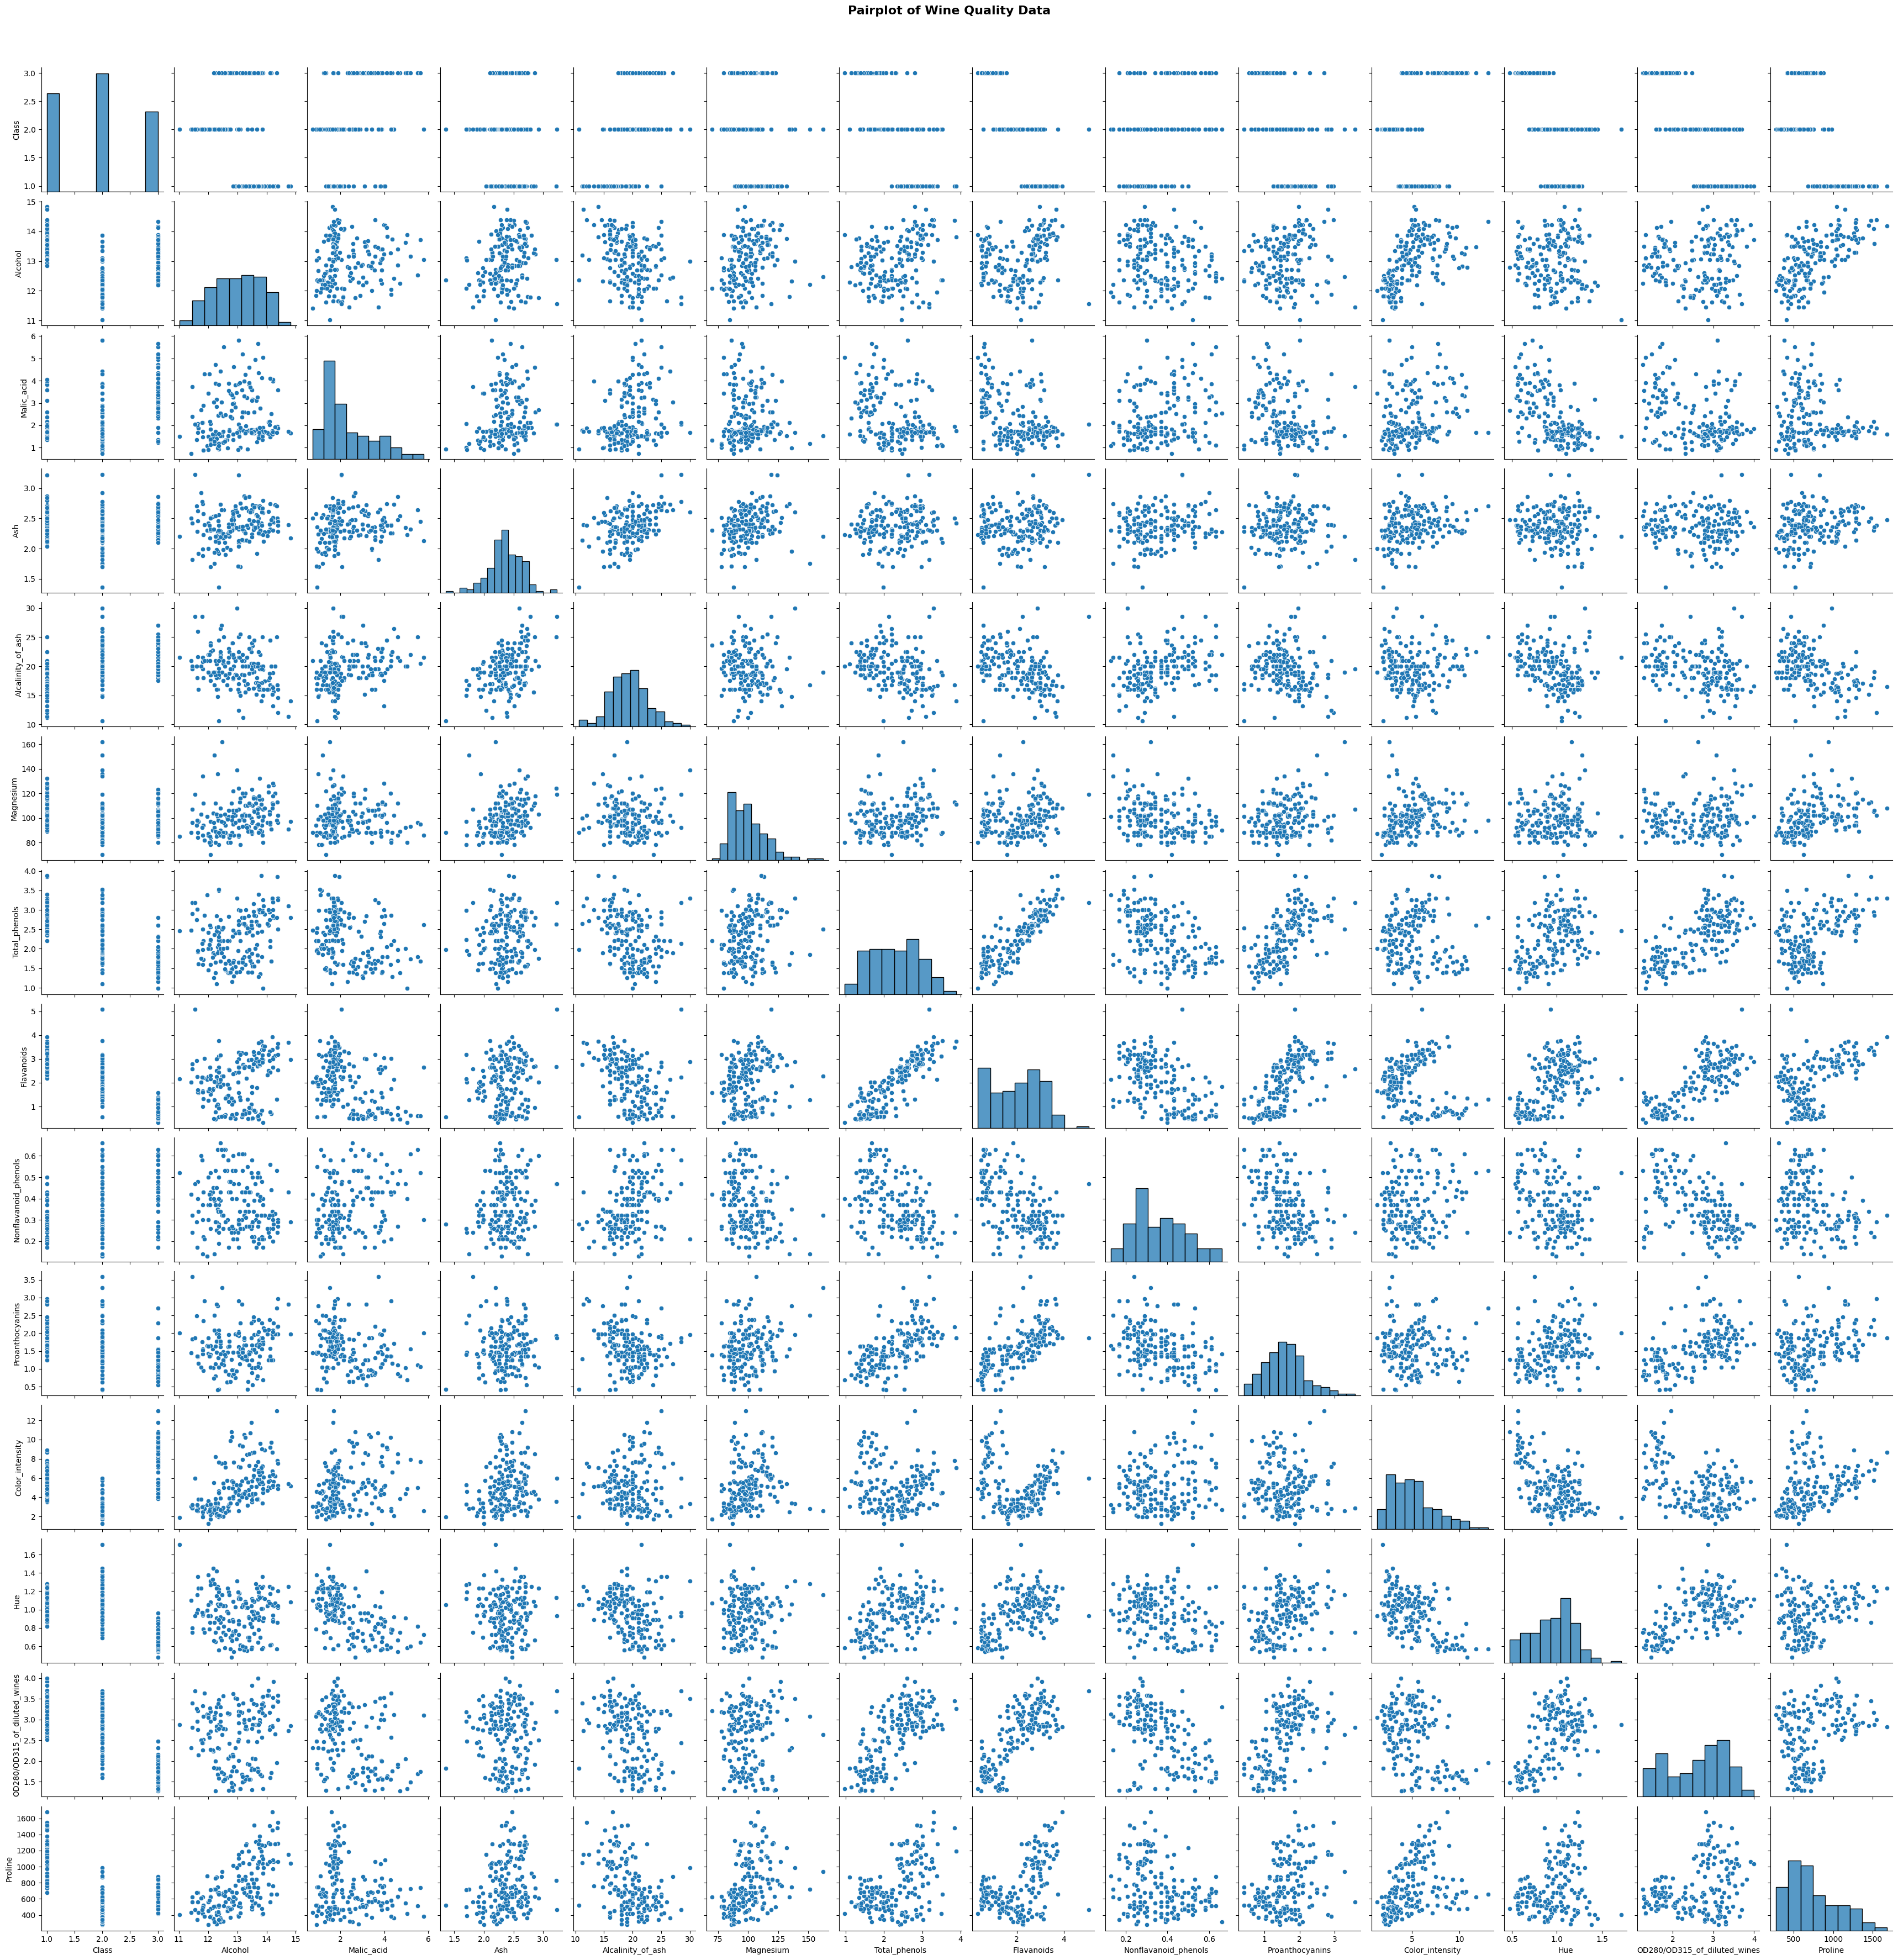

In [45]:
wine = pd.read_csv('./data/wine_data.csv')

plt.figure(figsize=(15, 8))

sns.pairplot(wine, palette='Set1', diag_kind='hist', markers=['o', 's'])
plt.suptitle('Pairplot of Wine Quality Data', fontsize=16 , fontweight='bold', y=1.02)
plt.savefig('seaborn_visualizations.png', dpi=300, bbox_inches='tight') # The formats can be png, jpg, svg, pdf
plt.show()

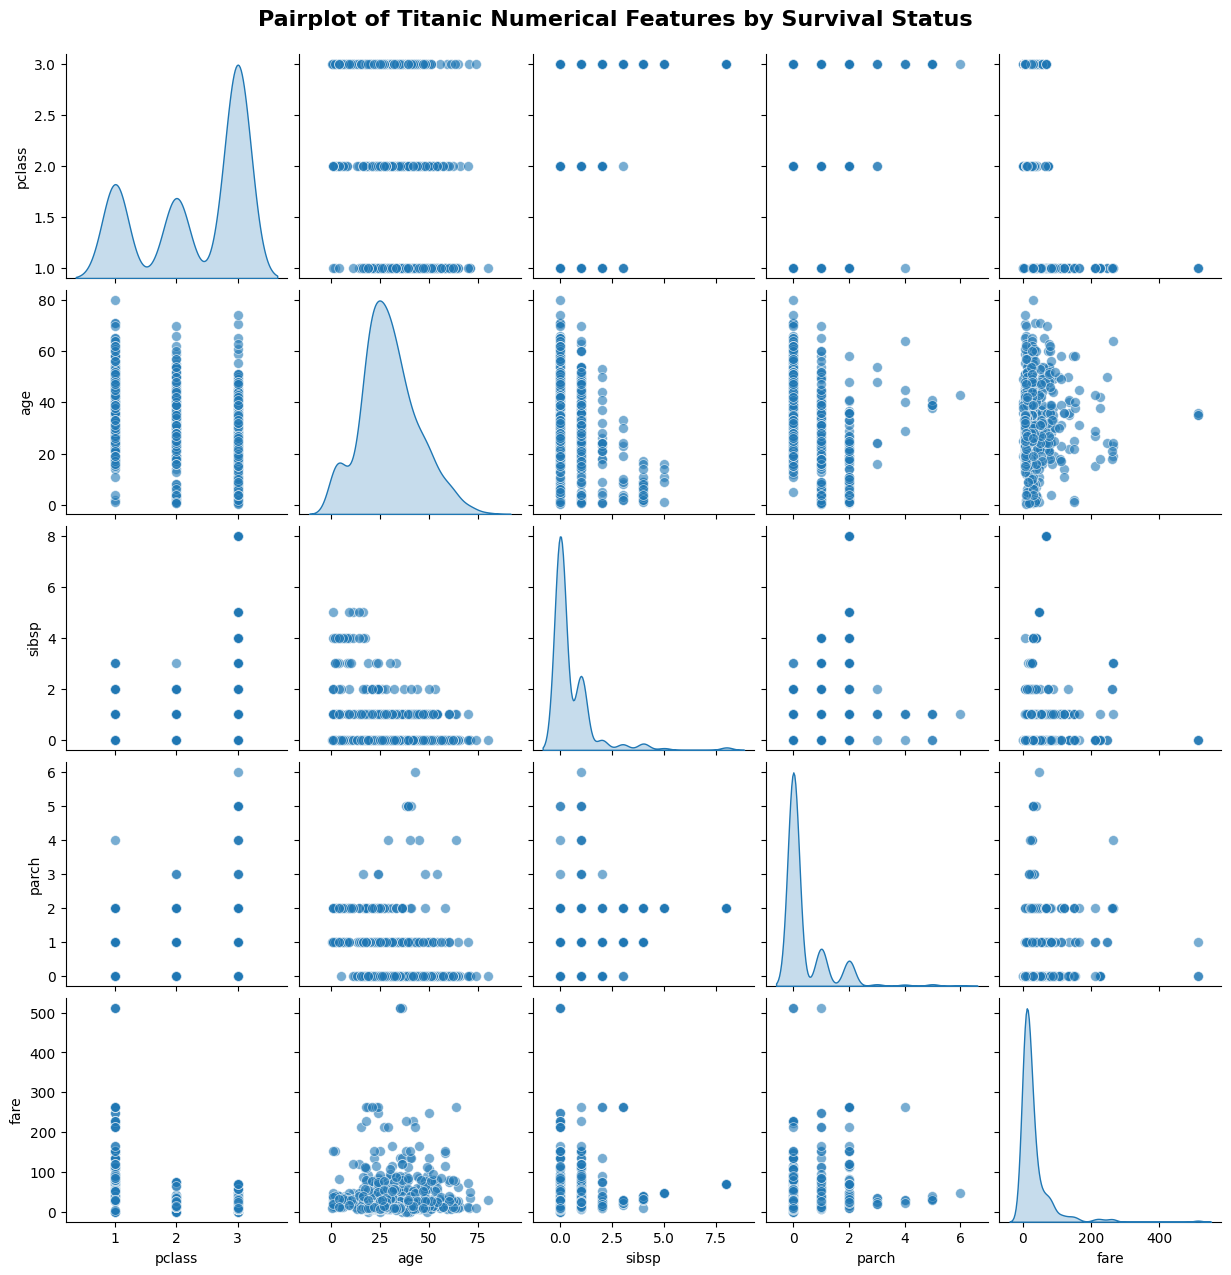

Each subplot shows relationships between pairs of numerical features.
 The diagonal plots display the distribution of each feature using KDE plots.
 This visualization helps identify correlations and patterns among the features.


In [21]:
# Basic pairplot with numeric features
cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']


sns.pairplot(titanic[cols], palette='Set1', diag_kind='kde', markers=['o', 's'], plot_kws={'alpha':0.6, 's':50})

plt.suptitle('Pairplot of Titanic Numerical Features by Survival Status', fontsize=16, fontweight='bold', y=1.02)

plt.show()


print("Each subplot shows relationships between pairs of numerical features.\n The diagonal plots display the distribution of each feature using KDE plots.\n This visualization helps identify correlations and patterns among the features.")

In [42]:
# wine.info()

## Review of the plots

In [ ]:
# Line Plot: To observe trends and patterns over time or continuous range of values
# Scatter Plot: To visualize relationships between two numerical variables. Shows correlations, clusters, and outliers.
# Bar Plot: To compare categorical data. Useful for showing differences in means or counts across categories.
# Histogram: To understand the distribution of a single numerical variable.
# KDE Plot: To visualize the probability density function of a continuous variable, providing insights into its distribution.
# Box Plot: To summarize the distribution of a numerical variable and identify outliers across different categories.
# Heatmap: To visualize correlations between numerical variables or to display aggregated values across two categorical variables.
# Pair Plot: To explore relationships between multiple numerical variables simultaneously.